<a href="https://colab.research.google.com/github/gianghuynh/Personal/blob/main/data_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [ ]:
path = '/content/drive/MyDrive/Dataset_Advertising_Original.csv'
df = pd.read_csv(path,index_col=0)
df

,TV,radio,newspaper,sales,Area
id,,,,,
1,230.1,37.8,69.2,22.1,rural
2,44.5,39.3,45.1,10.4,suburban
3,17.2,45.9,69.3,9.3,rural
4,151.5,41.3,58.5,18.5,rural
5,180.8,10.8,58.4,12.9,urban
...,...,...,...,...,...
196,38.2,3.7,13.8,7.6,urban
197,94.2,4.9,8.1,9.7,urban
198,177.0,9.3,6.4,12.8,urban


In [ ]:
descriptive_stats = df.describe()
print(descriptive_stats)
frequency_area = df['Area'].value_counts()
print(frequency_area)

               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000
suburban    75
rural       65
urban       60
Name: Area, dtype: int64


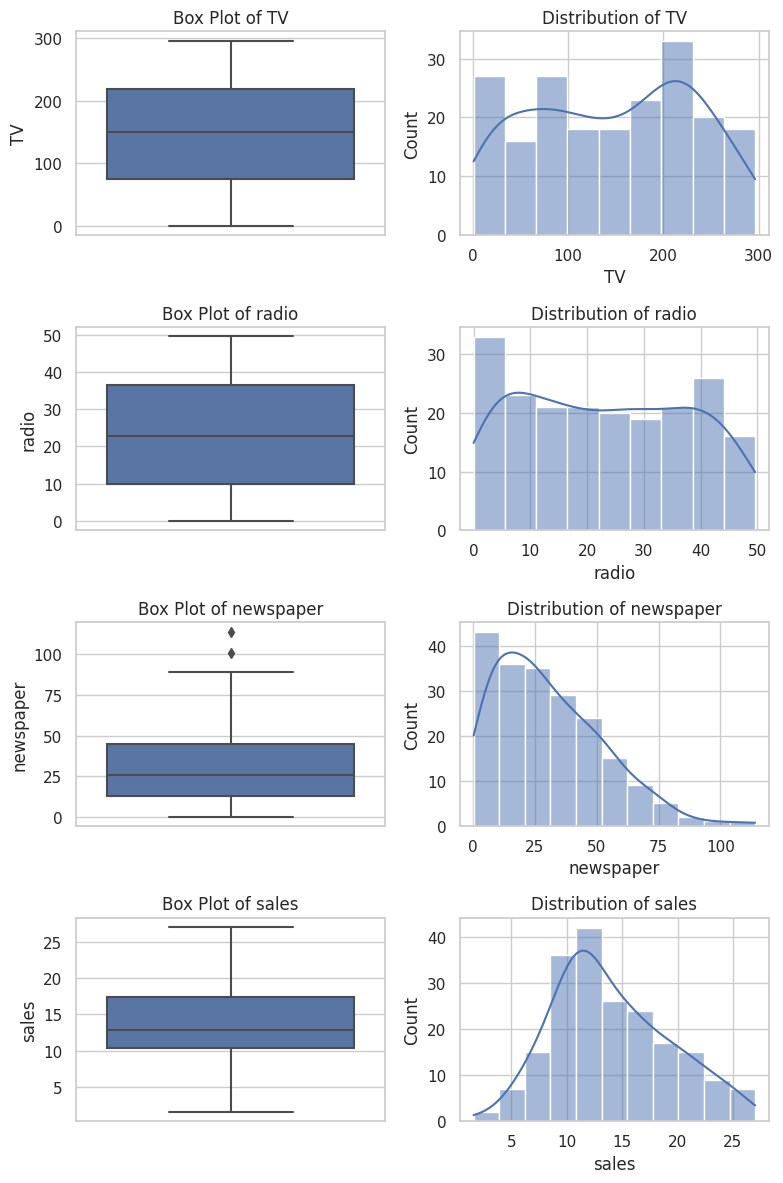

In [ ]:
sns.set(style="whitegrid")
columns = ['TV', 'radio', 'newspaper', 'sales']
#figure
fig, axes = plt.subplots(len(columns), 2, figsize=(8, 12))

for i, col in enumerate(columns):
    sns.boxplot(ax=axes[i, 0],y=df[col])
    axes[i, 0].set_title(f'Box Plot of {col}')
    sns.histplot(df[col], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

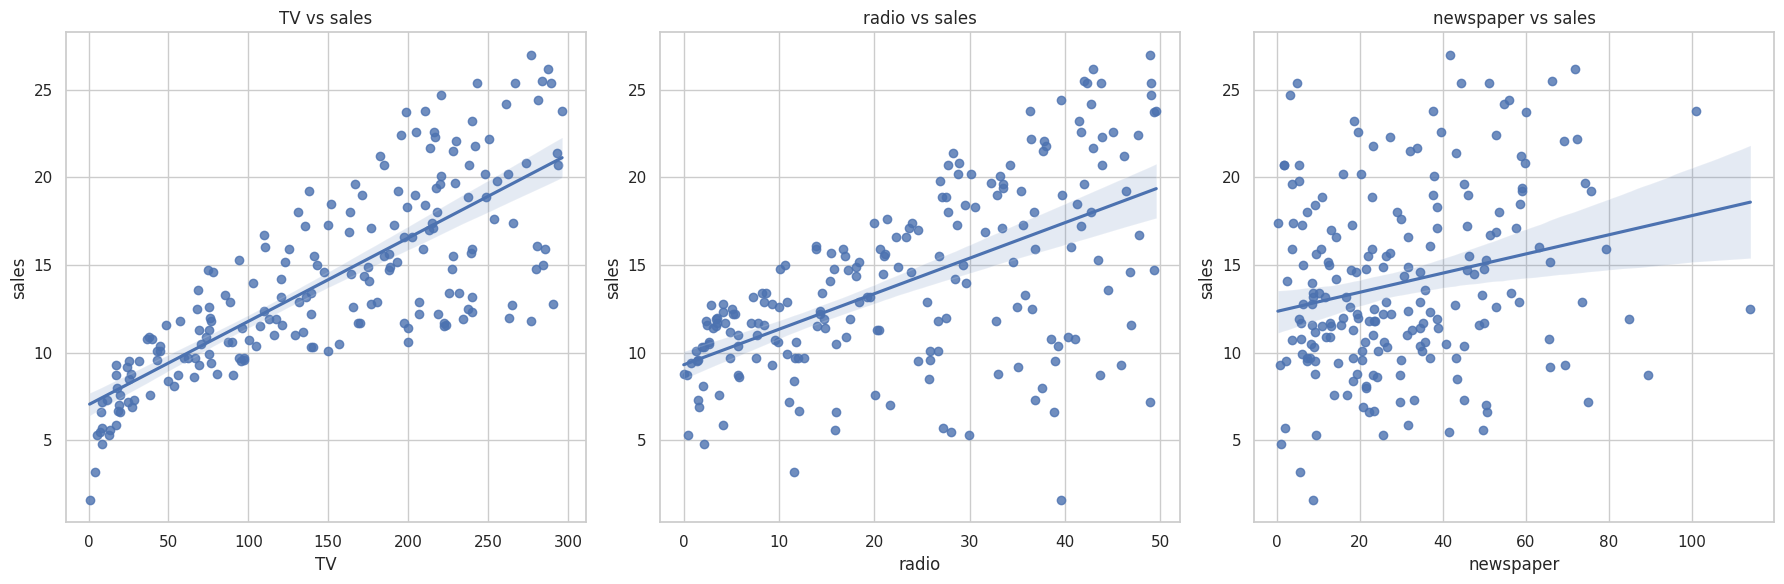

In [ ]:

channels = ['TV', 'radio', 'newspaper']
#scatter
plt.figure(figsize=(18, 6))
for i, channel in enumerate(channels):
    plt.subplot(1, len(channels), i + 1)
    sns.regplot(data=df, x=channel, y='sales')
    plt.title(f'{channel} vs sales')

plt.tight_layout()
plt.show()


In [ ]:
correlation_matrix = df[['TV', 'radio', 'newspaper', 'sales']].corr()
correlation_matrix_full = correlation_matrix
correlation_matrix_full

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


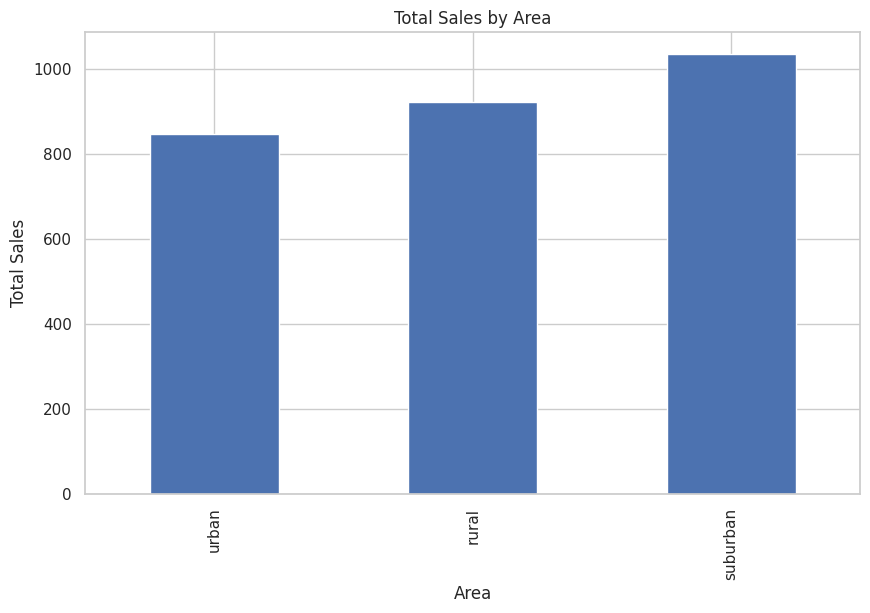

Area
urban        848.0
rural        921.7
suburban    1034.8
Name: sales, dtype: float64

In [ ]:
sales_sum = df.groupby('Area')['sales'].sum().sort_values()
sales_sum.plot(kind='bar', title='Total Sales by Area', ylabel='Total Sales', figsize=(10, 6))
plt.show()
sales_sum

In [ ]:
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 23 Dec 2023   Prob (F-statistic):           1.58e-96
Time:                        03:59:53   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [ ]:
area_dummies = pd.get_dummies(df['Area'], drop_first=True)
X = pd.concat([df[['TV', 'radio', 'newspaper']], area_dummies], axis=1)
X = sm.add_constant(X)
y = df['sales']
model_with_area = sm.OLS(y, X).fit()
model_with_area_summary = model_with_area.summary()
print(model_with_area_summary)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     340.8
Date:                Sat, 23 Dec 2023   Prob (F-statistic):           5.17e-94
Time:                        03:59:53   Log-Likelihood:                -385.61
No. Observations:                 200   AIC:                             783.2
Df Residuals:                     194   BIC:                             803.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0660      0.361      8.493      0.0

In [ ]:
area_mapping = {'rural': 1, 'suburban': 2, 'urban': 3}
df['Area_ordinal'] = df['Area'].map(area_mapping)

model_ordinal_area = smf.ols('sales ~ TV + radio + newspaper + Area_ordinal', data=df).fit()
model_ordinal_area_summary = model_ordinal_area.summary()

model_ordinal_area_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     425.6
Date:                Sat, 23 Dec 2023   Prob (F-statistic):           4.05e-95
Time:                        03:59:53   Log-Likelihood:                -386.17
No. Observations:                 200   AIC:                             782.3
Df Residuals:                     195   BIC:                             798.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.9837      0.434      6.867      0.000       2.127       3.841
TV               0.0458      0.001     32.714      0.000       0.043       0.049
radio            0.1885      0.009     21.815      0.000       0.171       0.206
newspaper       -0.0010      0.006     -0.177      0.860      -0.013       0.011
Area_ordinal    -0.0225      0.151     -0.149      0.882      -0.321       0.276
==============================================================================
Omnibus:                       60.525   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.558
Skew:                          -1.330   Prob(JB):                     1.23e-33
Kurtosis:                       6.334   Cond. No.                         651.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
new_data = pd.DataFrame({
    'const': 1,
    'TV': [30],
    'radio': [10],
    'newspaper': [40],
    'suburban': [0],
    'urban': [1]
})

predicted_sales = model_with_area.predict(new_data)
predicted_sales[0]



6.226488767710919

In [ ]:
path = '/content/drive/MyDrive/Dataset_Tiki_accessories_orginal.csv'
df = pd.read_csv(path, index_col=0)
filterDf = pd.DataFrame(df[['price','fulfillment_type','brand','rating_average','review_count','pay_later','number_of_images','has_video','category']])

describe_tiki = filterDf.describe()
categorical_descriptive_stats = filterDf.describe(include=['object', 'bool'])
combined_descriptive_stats = pd.concat([describe_tiki, categorical_descriptive_stats], axis=1)
combined_descriptive_stats


,price,rating_average,review_count,number_of_images,fulfillment_type,brand,pay_later,has_video,category
count,1.240000e+02,124.000000,124.000000,124.000000,124,124,124,124,124
mean,7.038390e+04,0.440323,0.830645,5.153226,NaN,NaN,NaN,NaN,NaN
std,1.782808e+05,1.357719,4.197796,3.248625,NaN,NaN,NaN,NaN,NaN
min,8.000000e+03,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,4.400000e+04,0.000000,0.000000,3.000000,NaN,NaN,NaN,NaN,NaN
50%,4.425000e+04,0.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,6.000000e+04,0.000000,0.000000,6.000000,NaN,NaN,NaN,NaN,NaN
max,1.990000e+06,5.000000,30.000000,20.000000,NaN,NaN,NaN,NaN,NaN
unique,NaN,NaN,NaN,NaN,3,4,2,2,1
top,NaN,NaN,NaN,NaN,dropship,OEM,False,False,Phụ kiện thời trang


In [ ]:
#Price - Quantity
model = smf.ols('quantity_sold ~ price', data=df).fit()
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          quantity_sold   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                 4.634e-05
Date:                Sat, 23 Dec 2023   Prob (F-statistic):              0.995
Time:                        04:25:59   Log-Likelihood:                -498.35
No. Observations:                 124   AIC:                             1001.
Df Residuals:                     122   BIC:                             1006.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7291      1.311      2.844      0.005       1.133       6.325
price      -4.674e-08   6.87e-06     -0.007      0.995   -1.36e-05    1.35e-05
==============================================================================
Omnibus:                      156.374   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3646.251
Skew:                           4.822   Prob(JB):                         0.00
Kurtosis:                      27.753   Cond. No.                     2.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df['estimated_revenue'] = df['quantity_sold'] * df['price']
X = df[['rating_average']]  # Independent variable
y = df['estimated_revenue']  # Dependent variable

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:      estimated_revenue   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     44.69
Date:                Sat, 23 Dec 2023   Prob (F-statistic):           7.35e-10
Time:                        04:32:35   Log-Likelihood:                -1911.1
No. Observations:                 124   AIC:                             3826.
Df Residuals:                     122   BIC:                             3832.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.544e+04   1.14e+05      0.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset_Tiki_accessories_orginal.csv')
df['estimated_revenue'] = df['quantity_sold'] * df['price']

#dummy variables
df = pd.get_dummies(df, columns=['fulfillment_type', 'brand'], drop_first=True)
df.columns = df.columns.str.replace(' ', '_').str.replace('-', '_').str.replace('&', '_')

formula = 'estimated_revenue ~ price + review_count + rating_average + favourite_count + number_of_images + pay_later + has_video'

for column in df.columns:
    if 'brand_' in column or 'fulfillment_type_' in column:
        formula += ' + ' + column

model = smf.ols(formula, data=df).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      estimated_revenue   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     88.25
Date:                Sat, 23 Dec 2023   Prob (F-statistic):           1.28e-48
Time:                        04:36:43   Log-Likelihood:                -1795.5
No. Observations:                 124   AIC:                             3613.
Df Residuals:                     113   BIC:                             3644.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

                            OLS Regression Results                            
Dep. Variable:      estimated_revenue   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     803.9
Date:                Sat, 23 Dec 2023   Prob (F-statistic):           4.02e-95
Time:                        05:41:00   Log-Likelihood:                -1688.5
No. Observations:                 124   AIC:                             3393.
Df Residuals:                     116   BIC:                             3416.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

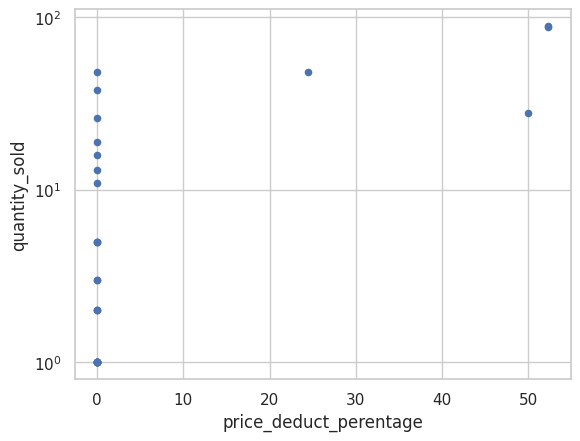

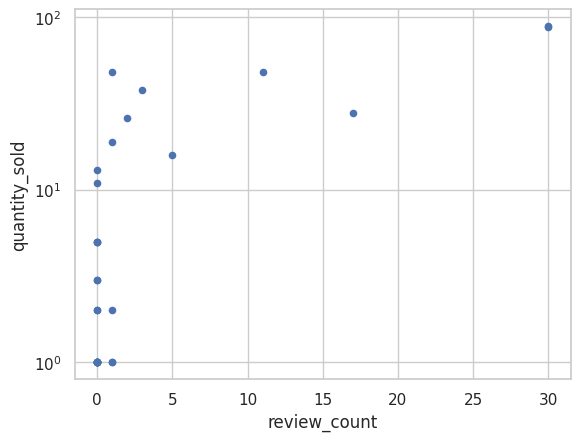

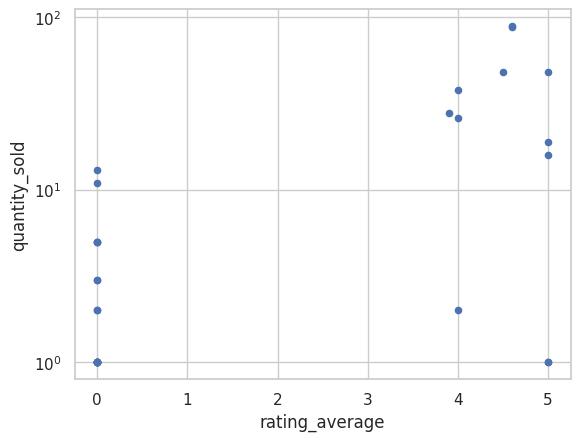

In [ ]:
path = '/content/drive/MyDrive/Dataset_Tiki_accessories_orginal.csv'
df = pd.read_csv(path, index_col=0)
df['estimated_revenue'] = df['quantity_sold'] * df['price']
df = pd.get_dummies(df, columns=['fulfillment_type', 'brand'], drop_first=True)
df.columns = df.columns.str.replace(' ', '_').str.replace('-', '_').str.replace('&', '_')
filterDf = df.drop(["category", "id", "name", "description", "fulfillment_type",
                    "brand", "pay_later", "current_seller", "date_created", "vnd_cashback", "has_video", "favourite_count","estimated_revenue"], axis="columns")
def calDeductPercent(originalPrice, price):
    return (1 - price/originalPrice)*100


calDeductPercentWithArr = np.frompyfunc(calDeductPercent, 2, 1)

ORIGINAL_PRICE = np.array(filterDf["original_price"])
PRICE = np.array(filterDf["price"])

PRICE_DEDUCT_PERCENTAGE = calDeductPercentWithArr(ORIGINAL_PRICE, PRICE)

filterDf.insert(2, "price_deduct_perentage", PRICE_DEDUCT_PERCENTAGE)

# filterDf['quantity_sold'].replace(0, 1, inplace=True)
# filterDf['review_count'].replace(0, 1, inplace=True)
# filterDf['price_deduct_perentage'].replace(0, 0.000000000001, inplace=True)


# print(filterDf.info())

results = smf.ols(
    'estimated_revenue ~ review_count + price_deduct_perentage + number_of_images + rating_average', data=filterDf).fit()

print(results.summary())

# Overview correlation of quantity_sold vs other aspect to find where to make calculation
# print(filterDf.corr())

filterDf.plot(kind='scatter', x='price_deduct_perentage', y='quantity_sold')
plt.yscale("log")

filterDf.plot(kind='scatter', x='review_count', y='quantity_sold')
plt.yscale("log")

filterDf.plot(kind='scatter', x='rating_average', y='quantity_sold')
plt.yscale("log")

plt.show()

In [ ]:
filterDf

,original_price,price,price_deduct_perentage,review_count,rating_average,number_of_images,quantity_sold
Column1,,,,,,,
3755,8000,8000,0.0,0,0.0,8,0
69,9000,9000,0.0,0,0.0,6,13
7855,12500,12500,0.0,1,5.0,5,48
3847,17000,17000,0.0,2,4.0,6,26
3857,17000,17000,0.0,0,0.0,6,0
...,...,...,...,...,...,...,...
10114,120000,120000,0.0,0,0.0,2,0
11422,258000,123000,52.325581,30,4.6,15,89
13692,258000,123000,52.325581,30,4.6,15,88
